In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime

In [2]:
%run -i "D:/crs/src/NOPP_Utilities/storm_coords.py"
%run -i "D:/crs/src/NOPP_Utilities/scat_stats.py"

In [3]:
# Target date
start_date = np.datetime64('2019-09-03 00:00:00')
end_date = np.datetime64('2019-09-07 00:00:00')
tol = np.timedelta64(14, 'm') # not used

In [4]:
# NDBC buoy data
buoy = ['41159','41025']
lonb = [-76.946, -75.363]
latb = [34.213, 35.025]
bdepth = [30., 48.8]

In [5]:
urlb1 = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'+buoy[0]+'/'+buoy[0]+'h2019.nc'
print(urlb1)
dsb1 = xr.open_dataset(urlb1)

wtime = dsb1['time']
idxws = int( np.where(wtime == start_date)[0][0] )
idxwe = int( np.where(wtime == end_date)[0][0] )
print(idxws, wtime[idxws])
print(idxwe, wtime[idxwe])
wtime1 = wtime.values[idxws:idxwe]
# Calculate the time difference between consecutive entries
print('If more than one value appears below, time delta [s] is not constant.')
time_diffs = np.diff(wtime1)/1.e9
print(np.unique(time_diffs))
print('Number of times: ',np.shape(wtime1))
Hso1 = np.squeeze( dsb1.wave_height[idxws:idxwe].values )
Tpo1 = np.squeeze( dsb1.dominant_wpd[idxws:idxwe].values.astype('timedelta64[s]').astype(float) )
Tmo1 = np.squeeze( dsb1.average_wpd[idxws:idxwe].values.astype('timedelta64[s]').astype(float) )
Dmo1 = np.squeeze( dsb1.mean_wave_dir[idxws:idxwe].values )

non_nan_indexes = np.where(~np.isnan(Hso1))[0]
# print(Hso2[non_nan_indexes])
wtime1 = wtime1[non_nan_indexes]
Hso1 = Hso1[non_nan_indexes]
Tpo1 = Tpo1[non_nan_indexes]
Tmo1 = Tmo1[non_nan_indexes]
Dmo1 = Dmo1[non_nan_indexes]
print('Number of times after removing NaNs', np.shape(wtime1))
print(np.shape(Hso1))

https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/41159/41159h2019.nc
11534 <xarray.DataArray 'time' ()> Size: 8B
array('2019-09-03T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2019-09-03
Attributes:
    long_name:      Epoch Time
    short_name:     time
    standard_name:  time
11725 <xarray.DataArray 'time' ()> Size: 8B
array('2019-09-07T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2019-09-07
Attributes:
    long_name:      Epoch Time
    short_name:     time
    standard_name:  time
If more than one value appears below, time delta [s] is not constant.
[1800 3600]
Number of times:  (191,)
Number of times after removing NaNs (191,)
(191,)


In [6]:
dsb1

<xarray.Dataset> Size: 1MB
Dimensions:                  (time: 17278, latitude: 1, longitude: 1)
Coordinates:
  * time                     (time) datetime64[ns] 138kB 2019-01-01 ... 2019-...
  * latitude                 (latitude) float32 4B 34.21
  * longitude                (longitude) float32 4B -76.95
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 138kB ...
    wind_spd                 (time, latitude, longitude) float32 69kB ...
    gust                     (time, latitude, longitude) float32 69kB ...
    wave_height              (time, latitude, longitude) float32 69kB ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] 138kB ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] 138kB ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 69kB ...
    air_temperature          (time, latitude, longitude) float32 69kB ...
    sea_surface_temperature  (time, latitude, longitude) float32 69kB ...
    dewpt_temperature        (time, latitude, longitude) float32 69kB ...
    visibility               (time, latitude, longitude) float32 69kB ...
    water_level              (time, latitude, longitude) float32 69kB ...
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with manual editing ...
    conventions:                     COARDS
    station:                         41159
    comment:                         Onslow Bay Outer, NC (217)
    location:                        34.213 N 76.949 W 
    DODS_EXTRA.Unlimited_Dimension:  time

In [7]:
urlb2 = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'+buoy[1]+'/'+buoy[1]+'h2019.nc'
print(urlb2)
dsb2 = xr.open_dataset(urlb2)

wtime = dsb2['time']
idxws2 = int( np.where(wtime == start_date)[0][0] )
idxwe2 = int( np.where(wtime == end_date)[0][0] )
print(idxws2, wtime[idxws2])
print(idxwe2, wtime[idxwe2])
wtime2 = wtime.values[idxws2:idxwe2]
# Calculate the time difference between consecutive entries
print('If more than one value appears below, time delta [s] is not constant.')
time_diffs = np.diff(wtime2)/1.e9
print(np.unique(time_diffs))

print('Number of times: ',np.shape( wtime2 ) )
Hso2 = np.squeeze( dsb2.wave_height[idxws2:idxwe2].values )
Tpo2 = np.squeeze( dsb2.dominant_wpd[idxws2:idxwe2].values.astype('timedelta64[s]').astype(float) )
Tmo2 = np.squeeze( dsb2.average_wpd[idxws2:idxwe2].values.astype('timedelta64[s]').astype(float) )
Dmo2 = np.squeeze( dsb2.mean_wave_dir[idxws2:idxwe2].values )

non_nan_indexes = np.where(~np.isnan(Hso2))[0]
# print(Hso2[non_nan_indexes])
wtime2 = wtime2[non_nan_indexes]
Hso2 = Hso2[non_nan_indexes]
Tpo2 = Tpo2[non_nan_indexes]
Tmo2 = Tmo2[non_nan_indexes]
Dmo2 = Dmo2[non_nan_indexes]
print('Number of times after removing NaNs', np.shape(wtime2))

https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/41025/41025h2019.nc
13209 <xarray.DataArray 'time' ()> Size: 8B
array('2019-09-03T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2019-09-03
Attributes:
    long_name:      Epoch Time
    short_name:     time
    standard_name:  time
13785 <xarray.DataArray 'time' ()> Size: 8B
array('2019-09-07T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2019-09-07
Attributes:
    long_name:      Epoch Time
    short_name:     time
    standard_name:  time
If more than one value appears below, time delta [s] is not constant.
[600]
Number of times:  (576,)
Number of times after removing NaNs (96,)


In [8]:
# Pamlico Sound model results
url='http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/dorian_coupled11/PAM/dorian_his.ncml'
dsm = xr.open_dataset(url)
latm = dsm.lat_rho.values
lonm = dsm.lon_rho.values
mtime = dsm.ocean_time.values
dsm

<xarray.Dataset> Size: 52GB
Dimensions:          (tracer: 2, s_rho: 16, s_w: 17, eta_rho: 857,
                      xi_rho: 1067, eta_u: 857, xi_u: 1066, eta_v: 856,
                      xi_v: 1067, eta_psi: 856, xi_psi: 1066, ocean_time: 193)
Coordinates:
  * s_rho            (s_rho) float64 128B -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 136B -1.0 -0.9375 -0.875 ... -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 7MB -76.89 -76.89 ... -75.84
    lat_rho          (eta_rho, xi_rho) float64 7MB 34.31 34.31 ... 36.84 36.84
    lon_u            (eta_u, xi_u) float64 7MB ...
    lat_u            (eta_u, xi_u) float64 7MB ...
    lon_v            (eta_v, xi_v) float64 7MB ...
    lat_v            (eta_v, xi_v) float64 7MB ...
    lon_psi          (eta_psi, xi_psi) float64 7MB ...
    lat_psi          (eta_psi, xi_psi) float64 7MB ...
  * ocean_time       (ocean_time) datetime64[ns] 2kB 2019-08-30 ... 2019-09-07
Dimensions without coordinates: tracer, eta_rho, xi_rho, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/91)
    ntimes           int32 4B ...
    ndtfast          int32 4B ...
    dt               float64 8B ...
    dtfast           float64 8B ...
    dstart           datetime64[ns] 8B ...
    nHIS             int32 4B ...
    ...               ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 11GB ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 11GB ...
    Pair             (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Hwave            (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Dwave            (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Pwave_top        (ocean_time, eta_rho, xi_rho) float32 706MB ...
Attributes: (12/32)
    file:                      ./Output/Dorian_Pam_his_00007.nc
    format:                    netCDF-3 64bit offset file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Hurricane Dorian
    var_info:                  ROMS/External/varinfo.dat
    ...                        ...
    tiling:                    012x007
    history:                   ROMS/TOMS, Version 3.9, Sunday - January 8, 20...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               DORIAN, ANA_BSFLUX, ANA_BTFLUX, ANA_FSOBC, ANA...
    EXTRA_DIMENSION.N:         16
    EXTRA_DIMENSION.boundary:  4

In [9]:
# Calculate the difference between the model grid points and the buoy locations; find model indices to closest points
model_shape = np.shape( lonm )
print('model shape: ',model_shape)
mask_rho = dsm.mask_rho.values
print('nlat, nlon: ',np.shape(mask_rho))

# Find the indices of the nearest lat/lon
dist1 = haversine( (lonm*mask_rho), (latm*mask_rho) , lonb[0], latb[0] )
ilat1, ilon1 = np.argwhere( dist1 == np.min(dist1) ).squeeze()
dist2 = haversine( (lonm*mask_rho), (latm*mask_rho) , lonb[1], latb[1] )
ilat2, ilon2 = np.argwhere( dist2 == np.min(dist2) ).squeeze()

print('ilat1, ilon1:', ilat1, ilon1 )
print('ilat2, ilon2:', ilat2, ilon2 )

model shape:  (857, 1067)
nlat, nlon:  (857, 1067)
ilat1, ilon1: 0 0
ilat2, ilon2: 18 916


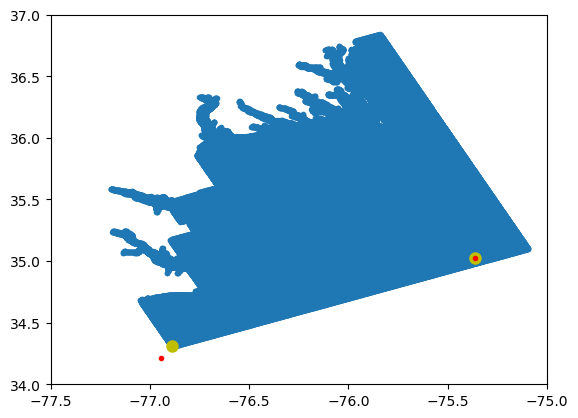

In [10]:
# Plot the grids, buoy locations, and corresponding grid point
_ = plt.plot((lonm*mask_rho).flatten(), (latm*mask_rho).flatten(), '.')
plt.xlim(-77.5, -75)
plt.ylim(34, 37)
plt.plot(lonm[ilat1, ilon1], latm[ilat1, ilon1], 'oy', ms = 8 )
plt.plot(lonm[ilat2, ilon2], latm[ilat2, ilon2], 'oy', ms = 8 )
plt.plot(lonb[0], latb[0], '.r', ms=6 )
plt.plot(lonb[1], latb[1], '.r', ms = 6 )

In [11]:
# Get the water depth
h1  = dsm.h[ilat1, ilon1].values
h2  = dsm.h[ilat1, ilon2].values
print(buoy[0],': buoy depth ',bdepth[0],', model depth: ',h1,' distance apart:',dist1[ilat1,ilon1]) 
print(buoy[1],': buoy depth ',bdepth[1],', model depth: ',h2,' distance apart:',dist2[ilat2,ilon2]) 

41159 : buoy depth  30.0 , model depth:  27.91462105383439  distance apart: 11.706557117427817
41025 : buoy depth  48.8 , model depth:  136.1044337471843  distance apart: 0.09769909135999073


In [12]:
# # Find common times between model and bouys
# common_times, tidxm, tidxb = np.intersect1d( ot, wtime1, return_indices=True)
# print(np.shape(tidxm))
# print(np.shape(tidxb))

# # Step 2: Extract data from dataset1 and dataset2 based on the common times
# Hsm1 =  dsm.Hwave[tidxm, ilat1, ilon1]
# print(np.shape(Hsm1))
# print(np.shape(Hso1[tidxb]))

In [13]:
# Time threshold of 9 minutes
time_threshold = np.timedelta64(9, 'm')

# Empty arrays to hold indices into each time series
windex_list = []
mindex_list = []

# Loop through each time in dataset_time1
for i, mt in enumerate(mtime):
    # Calculate absolute time differences between the current model time and all times in obs. time
    time_diffs = np.abs(wtime1 - mt)
    
    # Find the nearest index within the threshold
    idx = np.argmin(time_diffs)
    
    # Check if the nearest time difference is within the threshold
    if time_diffs[idx] <= time_threshold:
        # Append to the index lists
        windex_list.append(idx)
        mindex_list.append(i)

wtime1i = wtime1[windex_list]
Hso1i = Hso1[windex_list]
Tpo1i = Tpo1[windex_list]
Dmo1i = Dmo1[windex_list]
mtimei1 = mtime[mindex_list]
Hsm1 = dsm.Hwave.values[mindex_list, ilat1, ilon1]
Tpm1 = dsm.Pwave_top.values[mindex_list, ilat1, ilon1]
Dmm1 = dsm.Dwave.values[mindex_list, ilat1, ilon1]

# Do it again for the other buoy
time_threshold = np.timedelta64(21, 'm')
windex_list = []
mindex_list = []
# Loop through each time in dataset_time1
for i, mt in enumerate(mtime):
    # Calculate absolute time differences between the current model time and all times in obs. time
    time_diffs = np.abs(wtime2 - mt)
    
    # Find the nearest index within the threshold
    idx = np.argmin(time_diffs)
    
    # Check if the nearest time difference is within the threshold
    if time_diffs[idx] <= time_threshold:
        # Append to the index lists
        windex_list.append(idx)
        mindex_list.append(i)

wtime2i = wtime2[windex_list]
Hso2i = Hso2[windex_list]
Tpo2i = Tpo2[windex_list]
Dmo2i = Dmo2[windex_list]
mtimei2 = mtime[mindex_list]
Hsm2 = dsm.Hwave.values[mindex_list, ilat2, ilon2]
Tpm2 = dsm.Pwave_top.values[mindex_list, ilat2, ilon2]
Dmm2 = dsm.Dwave.values[mindex_list, ilat2, ilon2]

In [14]:
# Calclulate scatter stats
a, s = scat_stats_string( Hsm1, Hso1i, sep_lines=True )
txt = 'Bias: {0:.3f}\nRMSE: {1:.3f}\nNRMSE: {2:.3f}\nrho : {3:.3f}' \
    .format( a[4],a[2],a[5],a[3])
print(s)
print(txt)

N: 96
Nnan: 0
RMSE: 0.349
rho: 1.000
Bias: -0.029
NRMSE: 0.118
HH: 0.118
Bias: -0.029
RMSE: 0.349
NRMSE: 0.118
rho : 1.000


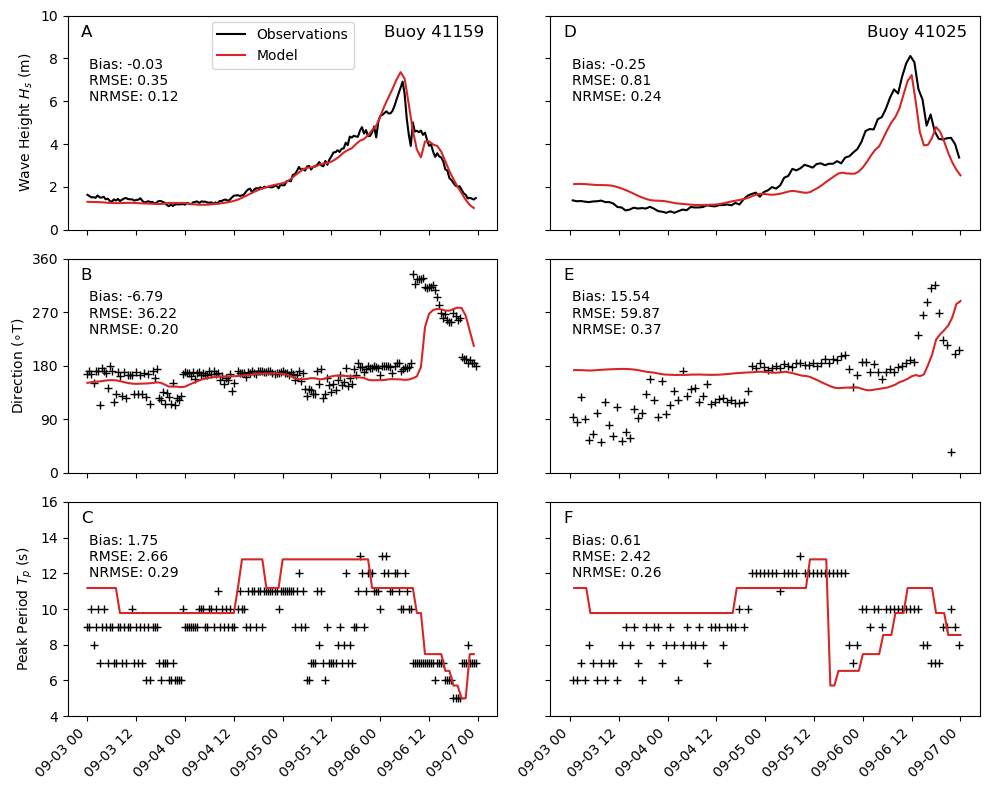

In [15]:
# Create an array with 12-hour increments
x_ticks = np.arange(start_date, end_date+np.timedelta64(12, 'h'), np.timedelta64(12, 'h'))

# Format the tick labels (e.g., 'MM-DD HH:MM' format)
x_labels = [pd.Timestamp(x).strftime('%m-%d %H') for x in x_ticks]

fig, axs = plt.subplots( 3, 2, sharex=True, sharey=False, figsize=( 10, 8 ) )

axs[0,0].plot(wtime1, Hso1, '-k', label='Observations')
axs[0,0].plot(mtimei1, Hsm1, '-', c='tab:red', label='Model')
a, s = scat_stats_string( Hsm1, Hso1i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[0,0].text(.05, .6, txt, fontsize=10, transform=axs[0,0].transAxes )
axs[0,0].text(.03, .9, 'A', fontsize=12, transform=axs[0,0].transAxes )
axs[0,0].text(.97, .9, 'Buoy 41159', fontsize=12, ha='right', transform=axs[0,0].transAxes )

axs[0,0].set_ylim((0,10))
axs[0,0].set_ylabel('Wave Height $H_s$ (m)')
axs[0,0].legend(loc='upper center')

axs[0,1].plot(wtime2, Hso2, '-k')
axs[0,1].plot(mtimei2, Hsm2, '-', c='tab:red' )
a, s = scat_stats_string( Hsm2, Hso2i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[0,1].text(.05, .6, txt, fontsize=10, transform=axs[0,1].transAxes )
axs[0,1].text(.03, .9, 'D', fontsize=12, transform=axs[0,1].transAxes )
axs[0,1].set_ylim((0,10))
axs[0,1].set_yticklabels([])
axs[0,1].text(.97, .9, 'Buoy 41025', fontsize=12, ha='right', transform=axs[0,1].transAxes )


axs[1,0].plot(wtime1, Dmo1, '+k')
axs[1,0].plot(mtimei1, Dmm1, '-', c='tab:red')
a, s = scat_stats_string( Dmm1, Dmo1i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[1,0].text(.05, .65, txt, fontsize=10, transform=axs[1,0].transAxes )
axs[1,0].text(.03, .9, 'B', fontsize=12, transform=axs[1,0].transAxes )

axs[1,0].set_ylim((0,360))
axs[1,0].set_yticks([0, 90, 180, 270, 360])
axs[1,0].set_ylabel('Direction ($\circ$T)')

axs[1,1].plot(wtime2, Dmo2, '+k')
axs[1,1].plot(mtimei2, Dmm2, '-', c='tab:red')
a, s = scat_stats_string( Dmm2, Dmo2i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[1,1].text(.05, .65, txt, fontsize=10, transform=axs[1,1].transAxes )
axs[1,1].text(.03, .9, 'E', fontsize=12, transform=axs[1,1].transAxes )
axs[1,1].set_ylim((0,360))
axs[1,1].set_yticks([0, 90, 180, 270, 360])
axs[1,1].set_yticklabels([])

axs[2,0].plot(wtime1, Tpo1, '+k')
axs[2,0].plot(mtimei1, Tpm1, '-', c='tab:red')
a, s = scat_stats_string( Tpm1, Tpo1i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[2,0].text(.05, .65, txt, fontsize=10, transform=axs[2,0].transAxes )
axs[2,0].text(.03, .9, 'C', fontsize=12, transform=axs[2,0].transAxes )

axs[2,0].set_ylim((4,16))
axs[2,0].set_xticks( x_ticks )
axs[2,0].set_xticklabels(x_labels, rotation=45, ha="right")
axs[2,0].set_ylabel('Peak Period $T_p$ (s)')

axs[2,1].plot(wtime2, Tpo2, '+k')
axs[2,1].plot(mtimei2, Tpm2, '-', c='tab:red')
a, s = scat_stats_string( Tpm2, Tpo2i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[2,1].text(.05, .65, txt, fontsize=10, transform=axs[2,1].transAxes )
axs[2,1].text(.03, .9, 'F', fontsize=12, transform=axs[2,1].transAxes )
axs[2,1].set_ylim((4,16))
axs[2,1].set_yticklabels([])
axs[2,1].set_xticks( x_ticks )
axs[2,1].set_xticklabels(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.savefig('dorian_wave_stats_comparison.png', bbox_inches='tight', dpi=200)